<a href="https://colab.research.google.com/github/ParimalnathReddy/EDA-ON-TERRORISM/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Exploratory-Data-Analysis---Terrorism**
Dataset : https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Importing and observing the data**

In [3]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...      0.0       0.0     0.0      NaN
1  197000000002   1970       0     0  ...      1.0       1.0     1.0      NaN
2  197001000001   1970       1     0  ...     -9.0       1.0     1.0      NaN
3  197001000002   1970       1     0  ...     -9.0       1.0     1.0      NaN
4  197001000003   1970       1     0  ...     -9.0       1.0     1.0      NaN

[5 rows x 135 columns]

In [4]:
df.tail()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
2904  197503270005   1975       3    27  ...      1.0       0.0     1.0      NaN
2905  197503270006   1975       3    27  ...      1.0       0.0     1.0      NaN
2906  197503270007   1975       3    27  ...      0.0       0.0     0.0      NaN
2907  197503270008   1975       3    27  ...      1.0       1.0     1.0      NaN
2908  197503270009   1975       3    27  ...      NaN       NaN     NaN      NaN

[5 rows x 135 columns]

In [5]:
df.columns.values 

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### **Cleaning the data**

In [7]:
df = df[["iyear", "imonth", "iday","country", "country_txt", "region_txt", "city","success", "attacktype1_txt","nkill", "propvalue", "targtype1_txt","latitude","gname","longitude", "targsubtype1_txt","target1","weaptype1_txt", "weapdetail"]]
df.head()

iyear  imonth  iday  ...                  target1 weaptype1_txt  weapdetail
0   1970       7     2  ...             Julio Guzman       Unknown         NaN
1   1970       0     0  ...  Nadine Chaval, daughter       Unknown         NaN
2   1970       1     0  ...                 Employee       Unknown         NaN
3   1970       1     0  ...             U.S. Embassy    Explosives   Explosive
4   1970       1     0  ...           U.S. Consulate    Incendiary  Incendiary

[5 rows x 19 columns]

In [10]:
df.columns

Index(['Year', 'Month', 'Day', 'Country_no', 'Country', 'Region', 'City',
       'success', 'Attack_type', 'no_of_kills', 'property_value',
       'Target_type', 'latitude', 'group_name', 'longitude', 'Target_sub_type',
       'Target', 'Weapon_type', 'Weapon_detail'],
      dtype='object')

In [12]:
df.rename(columns = {'iyear':'Year', "imonth":"Month","iday":"Day", "country":"Country_no",
                     "country_txt":"Country","region_txt":"Region","city":"City", "propvalue":"property_value",
                     "attacktype1_txt":"Attack_type", "targtype1_txt":"Target_type","gname":"group_name",
                     "targsubtype1_txt":"Target_sub_type", "target1":"Target", "nkill":"no_of_kills",
                     "weaptype1_txt":"Weapon_type", "weapdetail":"Weapon_detail"}, inplace = True)  # Renaming the column values...

In [ ]:
df.isnull().sum()  # displaying the null values of each dataset.

Year                   0
Month                  0
Day                    0
Country_no             0
Country                0
Region                 0
City                   0
success                0
Attack_type            0
no_of_kills         5626
property_value     27200
Target_type            0
latitude            1883
group_name             0
longitude           1883
Target_sub_type     1706
Target               372
Weapon_type            1
Weapon_detail       3514
dtype: int64

In [ ]:
df.shape  # displaying the number of rows and columns in the dataset

(34475, 19)

In [ ]:
df["City"].fillna("Unknown", inplace = True)
df["Target"].fillna("Unknown", inplace = True)
df["property_value"].fillna(0, inplace = True)
df["no_of_kills"].fillna(0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             34475 non-null  int64  
 1   Month            34475 non-null  int64  
 2   Day              34475 non-null  int64  
 3   Country_no       34475 non-null  int64  
 4   Country          34475 non-null  object 
 5   Region           34475 non-null  object 
 6   City             34475 non-null  object 
 7   success          34475 non-null  int64  
 8   Attack_type      34475 non-null  object 
 9   no_of_kills      34475 non-null  float64
 10  property_value   34475 non-null  float64
 11  Target_type      34475 non-null  object 
 12  latitude         32592 non-null  float64
 13  group_name       34475 non-null  object 
 14  longitude        32592 non-null  float64
 15  Target_sub_type  32769 non-null  object 
 16  Target           34475 non-null  object 
 17  Weapon_type 

In [13]:
df.describe()

Year        Month  ...     latitude    longitude
count  2909.000000  2909.000000  ...  2861.000000  2861.000000
mean   1972.122723     6.138536  ...    35.713904   -35.403239
std       1.585828     3.421309  ...    24.617529    53.617887
min    1970.000000     0.000000  ...   -43.532054  -157.818968
25%    1971.000000     3.000000  ...    34.097866   -75.135490
50%    1972.000000     6.000000  ...    40.697132    -7.312045
75%    1974.000000     9.000000  ...    54.183052    -1.977903
max    1975.000000    12.000000  ...    59.332788   172.636225

[8 rows x 9 columns]

### **Visualizing the data**

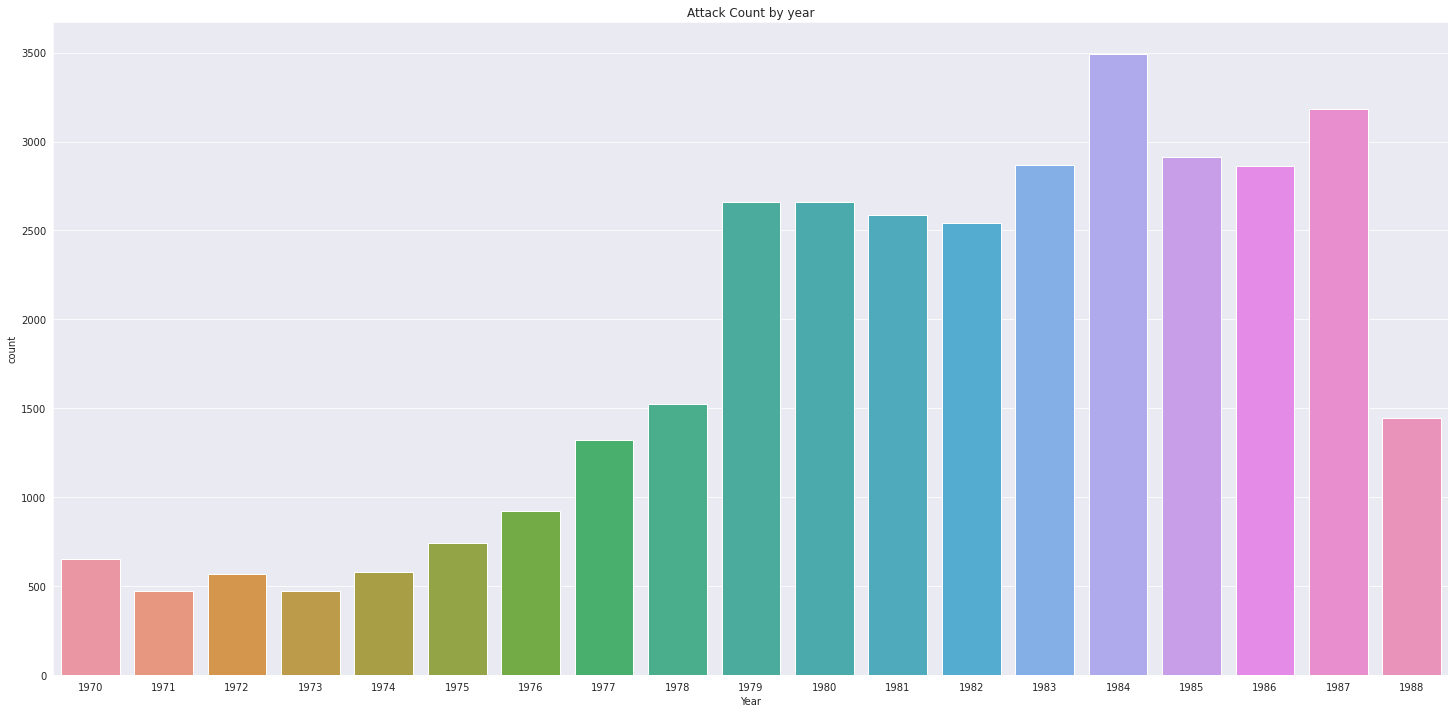

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,12))   #  Incresing figure size...
plt.title("Attack Count by year")  # Giving title to the graph...
_=sns.countplot(x ='Year', data = df)  # Using Count Plot...

## **Year wise attack**

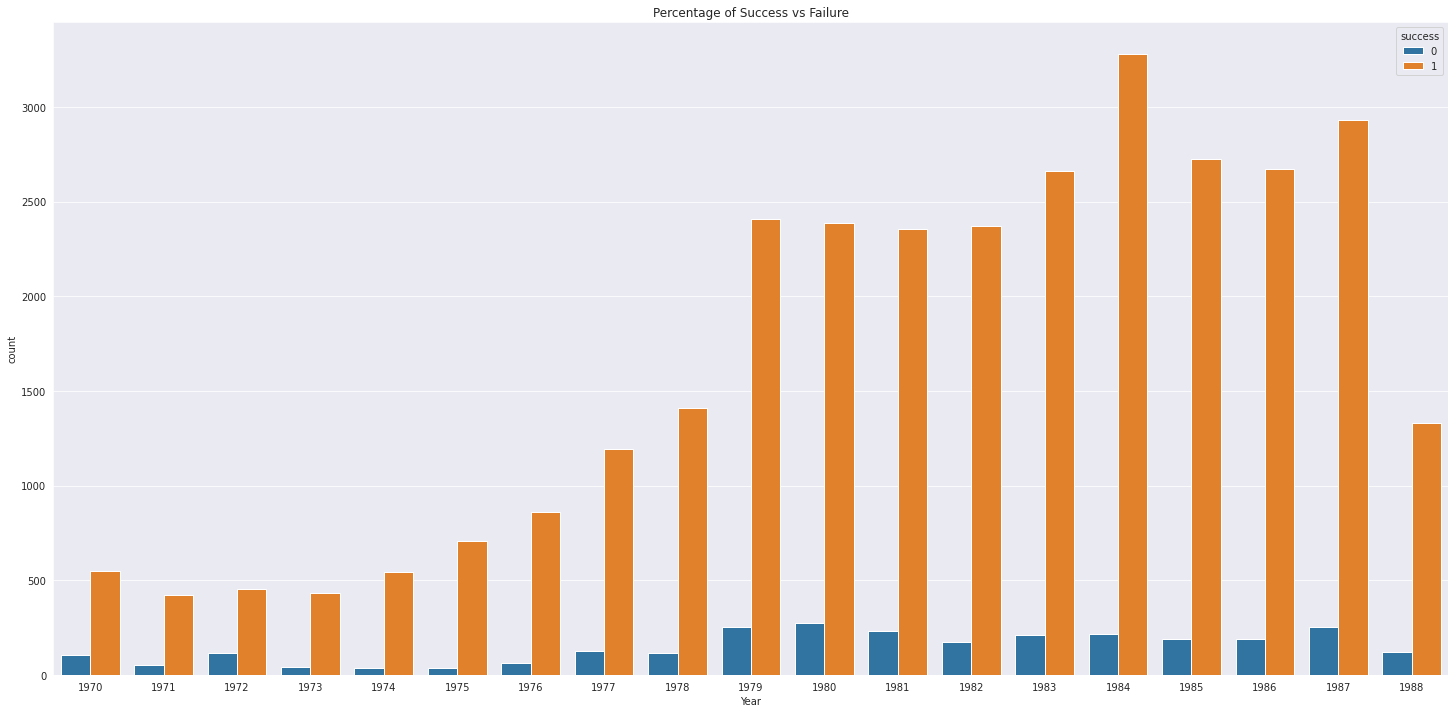

In [ ]:
plt.figure(figsize=(25,12))   
plt.title("Percentage of Success vs Failure") # printing the title
sns.set_style('darkgrid')  # Making background in a stylish format
sns.countplot(x ='Year', hue = "success", data = df)  #using countplot with year and success
plt.show() # showing the plot...

## **Region-Wise Attack**

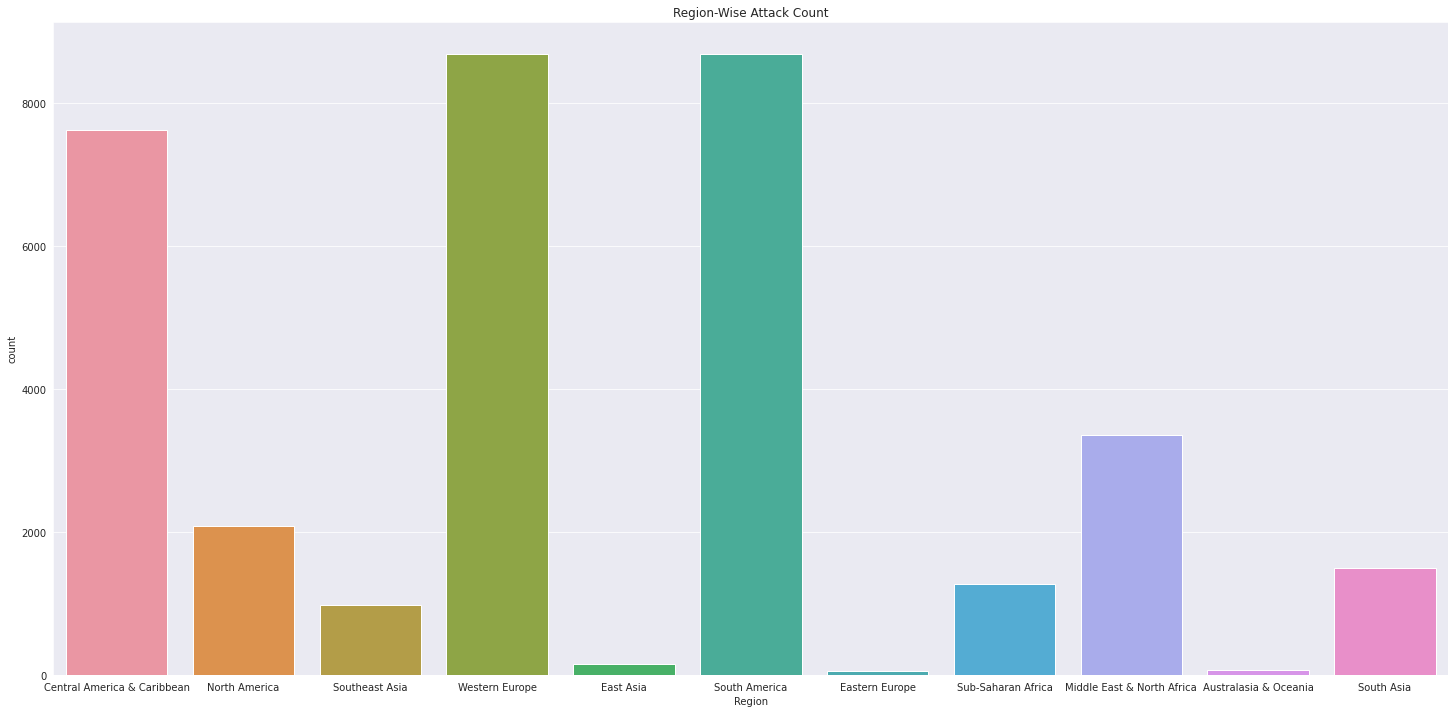

In [ ]:
plt.figure(figsize=(25,12))   #  Incresing figure size...
sns.set_style('darkgrid')
plt.title("Region-Wise Attack Count")  # Giving title to the graph...
_=sns.countplot(x ='Region', data = df)  # Using Count Plot...

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="Year", y="Region", color="Attack_type",size="no_of_kills", hover_name="Country", log_x=True, size_max=60,title='Attack type in each region & year')
fig.show() # Scatter plot is used to determine attack type in the specified region throughout the year..

In [ ]:
px.scatter_mapbox(df, lat="latitude", lon="longitude", color="Attack_type",size="no_of_kills",hover_name="City",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron",title='Number of Kills in each city')  # scatter Map box is used to determine the Attack type in the specified city with number of kills...

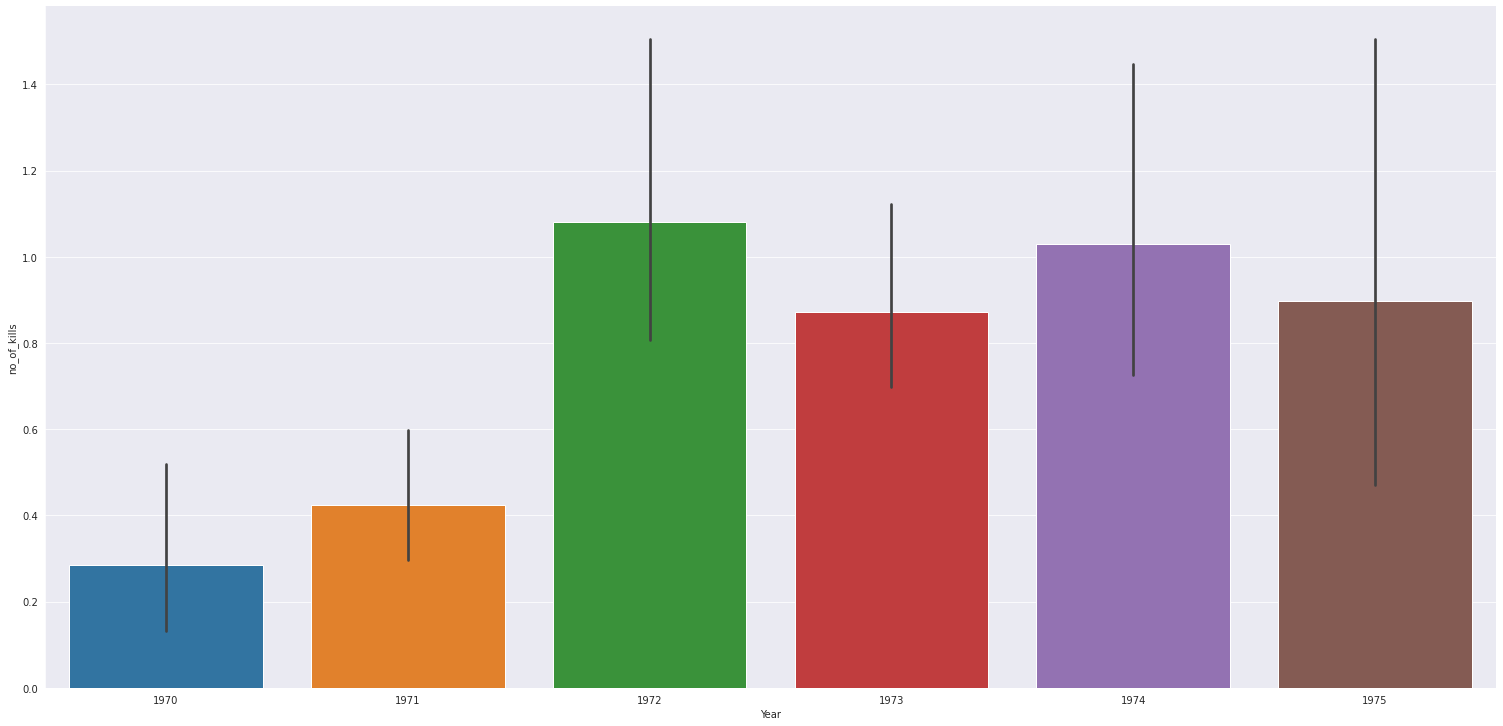

In [19]:
sns.set_style('darkgrid')
_ = sns.catplot(x ='Year', y ='no_of_kills', data = df, kind ='bar',height=10, aspect=27/13)

In [ ]:
px.pie(df, values='no_of_kills', names='Attack_type', title='Number of Kills per Attack') # using piechart to display the number of kills per attack..

In [ ]:
px.pie(df, values='no_of_kills', names='Weapon_type', title='Number of Kills by each Weapon') # using piechart to display the number of kills by each target

In [ ]:
px.pie(df, values='no_of_kills', names='Target_type', title='Number of Kills in each target') # using piechart to display the number of kills in each target

## **Conclusion:**

###            **The maximum mumber of kills where high in the year 1998. The Highest number of attacks takes place in the year 2014. In region wise attack the Middle-East Region has a Highest attack range. The Highest number of Succesfull attacks takes place in the year 2014. In the year 2010-2020 the Hostage Taking (Barricade Incident, Kidnapping) takes place at a wider range. In Armed Assault the number of kills where high about 38.9% Using Firearms and Explosives the number of kills were high. In Private Citizens and property the kill rate is high**